In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')
reviews=pd.read_csv("./gdrive/My Drive/Reviews.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data=reviews.copy()
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

      Score  Fréquence
2    Neutre       1649
1  Négatifs       2944
0  Positifs      15407


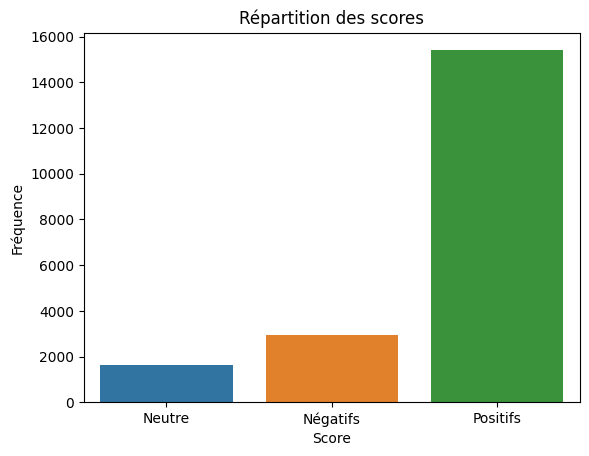

In [ ]:
# Effectuer le comptage des valeurs
counts = data['Score'].value_counts()

# Créer un tableau à partir des résultats
table = pd.DataFrame({'Score': counts.index, 'Fréquence': counts.values})
table = table.sort_values('Score')

# Afficher le tableau
print(table)

# Créer un graphique à barres avec seaborn
sns.barplot(x='Score', y='Fréquence', data=table)
plt.xlabel('Score')
plt.ylabel('Fréquence')
plt.title('Répartition des scores')
plt.show()


NE PAS EXCECUTER LA CELLULE NEUTRE/POSITIFS/NEGATIFS!!! 


              Intervalle  Fréquence
0      (22.706, 719.267]      17120
1    (719.267, 1405.533]       2269
2     (1405.533, 2091.8]        404
3     (2091.8, 2778.067]        129
4   (2778.067, 3464.333]         45
5     (3464.333, 4150.6]         15
6     (4150.6, 4836.867]          8
7   (4836.867, 5523.133]          7
11    (5523.133, 6209.4]          0
12    (6209.4, 6895.667]          0
13  (6895.667, 7581.933]          0
14    (7581.933, 8268.2]          0
8     (8268.2, 8954.467]          1
9   (8954.467, 9640.733]          1
10   (9640.733, 10327.0]          1


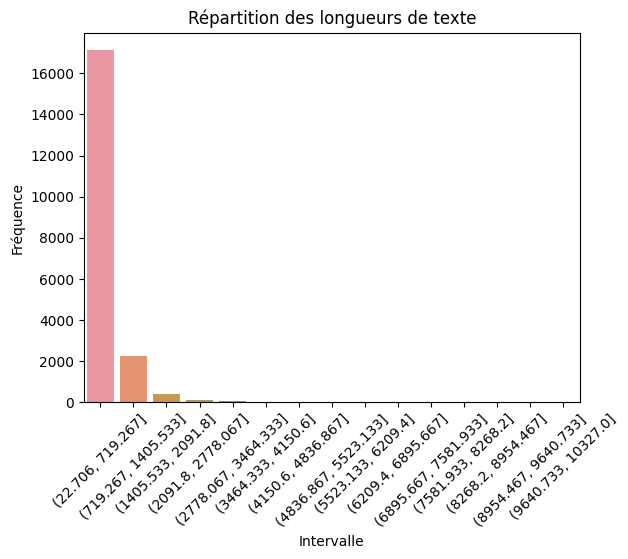

In [ ]:
pd.cut(data.Text.str.len(), bins=10).value_counts()

# Effectuer le découpage des données
bins = pd.cut(data.Text.str.len(), bins=15)
counts = bins.value_counts()

# Créer un tableau à partir des résultats
table = pd.DataFrame({'Intervalle': counts.index, 'Fréquence': counts.values})
table = table.sort_values('Intervalle')

# Afficher le tableau
print(table)

# Créer un graphique à barres avec seaborn
sns.barplot(x='Intervalle', y='Fréquence', data=table)
plt.xlabel('Intervalle')
plt.ylabel('Fréquence')
plt.title('Répartition des longueurs de texte')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pd.cut(data.groupby("UserId").UserId.count(), bins=10).value_counts()

(0.553, 45.7]     255739
(45.7, 90.4]         244
(90.4, 135.1]         48
(135.1, 179.8]        20
(179.8, 224.5]         3
(358.6, 403.3]         2
(403.3, 448.0]         2
(224.5, 269.2]         1
(269.2, 313.9]         0
(313.9, 358.6]         0
Name: UserId, dtype: int64

In [ ]:
pd.cut(data.groupby("ProductId").ProductId.count(), bins=10).value_counts()

(0.088, 92.2]     73314
(92.2, 183.4]       606
(183.4, 274.6]      174
(274.6, 365.8]       75
(365.8, 457.0]       51
(457.0, 548.2]       20
(548.2, 639.4]       17
(821.8, 913.0]        1
(639.4, 730.6]        0
(730.6, 821.8]        0
Name: ProductId, dtype: int64

In [ ]:
pd.to_datetime(data['Time'], unit='s').dt.year.value_counts()

2012    198659
2011    163299
2010     85884
2009     55326
2008     34163
2007     22300
2006      6671
2005      1335
2004       561
2003       132
2002        73
2000        32
2001        13
1999         6
Name: Time, dtype: int64

In [ ]:
data=data[0:20000]

THRESH_MAX=100

In [ ]:
data["clean_text"]=data["Text"].str.lower()

data["clean_text"]=data.clean_text.str.split(" ").str[0:THRESH_MAX].str.join(" ")

In [ ]:
# Lemma avec POS_Tag

import nltk
import string
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    # Supprimer les balises HTML
    text = re.sub('<.*?>', '', text)
    # Supprimer les abréviations "n't" et "'m"
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'m", " am", text)
    return text

def lemmatize(texts):
    lemmatized_texts = []
    for text in texts:
        # Nettoyer le texte
        cleaned_text = clean_text(text)
        tokens = nltk.word_tokenize(cleaned_text)
        lemmatized_text = " ".join([lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens if token.lower() not in stopwords and token not in string.punctuation])
        lemmatized_texts.append(lemmatized_text)
    return lemmatized_texts

# Lemmatization
data["review_lemmatized"] = lemmatize(data["clean_text"])

# Join lemmatized texts
text = " ".join(review for review in data["review_lemmatized"])

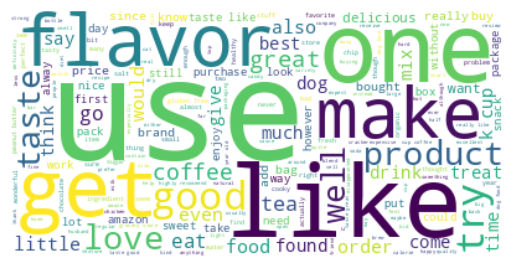

                Word  Frequency
0                use       3588
1               like       3524
2                one       3473
3                get       3437
4             flavor       3161
...              ...        ...
24578  amazon flavor          1
24579       teas tea          1
24580       tea food          1
24581      eats good          1
24582     teas would          1

[24583 rows x 2 columns]


In [ ]:
# Wordcloud + Tableau 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Generate WordCloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white")
wordcloud.generate(text)

# Generate word frequencies
word_frequencies = wordcloud.process_text(text)
sorted_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Display WordCloud as image
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Display WordCloud as table
word_table = pd.DataFrame(sorted_frequencies, columns=['Word', 'Frequency'])
print(word_table)


Maintenant que nous avons bonne connaissance des données, et que le pré-traitement de celle-ci a bien été effectué; 

In [ ]:
# import nexessaire à la vectorisation et aux modèles de machine learning

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


In [ ]:
# Text vectorization
vectorizer = TfidfVectorizer(max_df=0.4, min_df=0.02)
X = data['review_lemmatized']
y = data['Score']

data["Score"]=data["Score"]
TRAIN_RATIO = 0.2
X_train, X_test, y_train, y_test = train_test_split(data[["review_lemmatized"]], 
                                                    data["Score"], 
                                                    stratify=data["Score"], 
                                                    train_size=TRAIN_RATIO)

X_train = vectorizer.fit_transform(X_train["review_lemmatized"])
X_test = vectorizer.transform(X_test["review_lemmatized"])

In [ ]:
# shape des sets de training et testing

print("Train set shape:", X_train.shape, y_train.shape)
print("Train set class distribution:", y_train.value_counts())

print("Test set shape:", X_test.shape, y_test.shape)
print("Test set class distribution:", y_test.value_counts())


Train set shape: (4000, 258) (4000,)
Train set class distribution: 5    2514
4     567
1     365
3     330
2     224
Name: Score, dtype: int64
Test set shape: (16000, 258) (16000,)
Test set class distribution: 5    10057
4     2269
1     1459
3     1319
2      896
Name: Score, dtype: int64


In [ ]:

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.toarray())
X_test_scaled = scaler.transform(X_test.toarray())

# Define the logistic regression classifier with class weighting
classifier = LogisticRegression(class_weight='balanced', max_iter=1000)

# Fit the classifier with your training data
classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_scaled)

In [ ]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute metrics using confusion matrix values
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.4705
Precision: 0.6108878848134938
Recall: 0.4705
F1-score: 0.5165677901896258


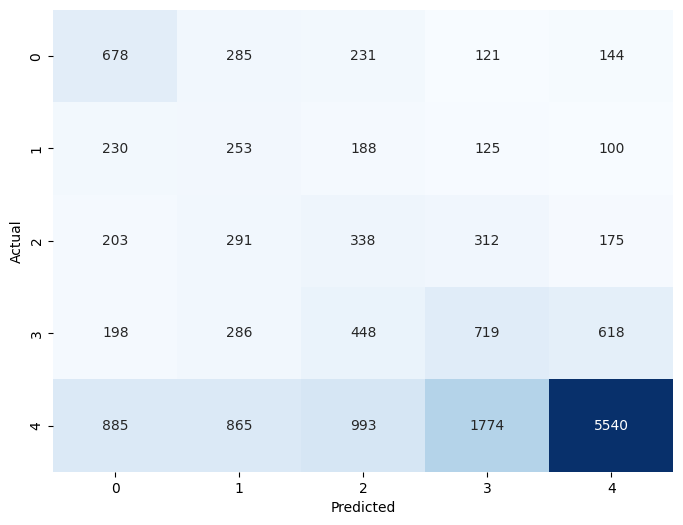

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Modèle de régression logistique
model = LogisticRegression(max_iter=1000)
params = {'C': [0.1, 1, 10]}

grid = GridSearchCV(model, param_grid=params, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

print("Logistic Regression (Best parameters: {}):".format(best_params))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr'))

Logistic Regression (Best parameters: {'C': 10}):
F1-score: 0.5934913809111708
Accuracy: 0.6393125
Precision: 0.5737722653514208
Recall: 0.6393125
ROC AUC: 0.7638988548071429


In [ ]:
# Nouvelle phrase
new_sentence = "i hated it but i would recommand it"

# Transformer la phrase en entrées numériques
new_sentence_vector = vectorizer.transform([new_sentence])

# Mettre à l'échelle les entrées numériques
new_sentence_vector_scaled = scaler.transform(new_sentence_vector.toarray())

# Utiliser le modèle pour prédire la classe de la nouvelle phrase
predicted_class = best_model.predict(new_sentence_vector_scaled)

# Inverser la prédiction
predicted_class_inverted = 6 - predicted_class


print("Predicted class for the new sentence:", predicted_class)



Predicted class for the new sentence: [2]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modèle Random Forest
model = RandomForestClassifier()
params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

grid = GridSearchCV(model, param_grid=params, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

print("Random Forest (Best parameters: {}):".format(best_params))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr'))

Random Forest (Best parameters: {'max_depth': None, 'n_estimators': 100}):
F1-score: 0.7099936924658368
Accuracy: 0.7841875
Precision: 0.7759419479790866
Recall: 0.7841875
ROC AUC: 0.7819819680667027


In [ ]:
from sklearn.svm import SVC

# Modèle SVM
model = SVC()
params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid = GridSearchCV(model, param_grid=params, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("SVM (Best parameters: {}):".format(best_params))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))


SVM (Best parameters: {'C': 10, 'kernel': 'rbf'}):
F1-score: 0.7502396147431992
Accuracy: 0.7923125
Precision: 0.7447532933800287
Recall: 0.7923125


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Modèle Gradient Boosting
model = GradientBoostingClassifier()
params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}

grid = GridSearchCV(model, param_grid=params, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

print("Gradient Boosting (Best parameters: {}):".format(best_params))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr'))

Gradient Boosting (Best parameters: {'max_depth': 5, 'n_estimators': 200}):
F1-score: 0.7311757516947529
Accuracy: 0.78225
Precision: 0.7269251777656968
Recall: 0.78225
ROC AUC: 0.796916369365447


In [ ]:
from lightgbm import LGBMClassifier

# Modèle LightGBM
model = LGBMClassifier()
params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}

grid = GridSearchCV(model, param_grid=params, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

print("LightGBM (Best parameters: {}):".format(best_params))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr'))

LightGBM (Best parameters: {'max_depth': 7, 'n_estimators': 200}):
F1-score: 0.7437802367590934
Accuracy: 0.78925
Precision: 0.7399904698245673
Recall: 0.78925
ROC AUC: 0.8071773686172217


In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Modèle Naive Bayes
model = MultinomialNB()
params = {'alpha': [0.1, 1]}

grid = GridSearchCV(model, param_grid=params, cv=5, scoring='f1_weighted')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_params = grid.best_params_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

print("Naive Bayes (Best parameters: {}):".format(best_params))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba, average='weighted', multi_class='ovr'))

Naive Bayes (Best parameters: {'alpha': 0.1}):
F1-score: 0.6747286867946244
Accuracy: 0.771875
Precision: 0.7524622908384687
Recall: 0.771875
ROC AUC: 0.8099574518628733
